{'Article': 'https://metro.co.uk/2020/09/21/ftse-100-suffers-worst-day-since-mid-june-as-shares-tumble-over-lockdown-fears-13304315/', 'BiasIndicator': 0    21.7816
dtype: object, 'Incredibility%': 0    17.5
Name: CredibilityScore, dtype: object, 'Polarity%': 0   -0.146588
Name: Polarity, dtype: float64, 'Subjectivity%': 0    47.698325
Name: Subjectivity, dtype: float64, 'ArticleIncredibility': 0    26.9017
dtype: object, 'ArticlePolarity': 0   -0.22534
dtype: object, 'ArticleSubjectivity': 0    73.3237
dtype: object}


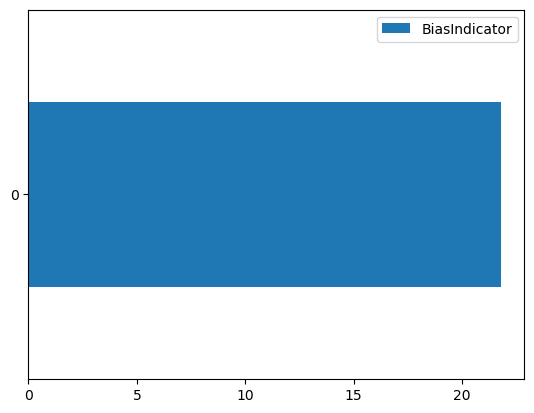

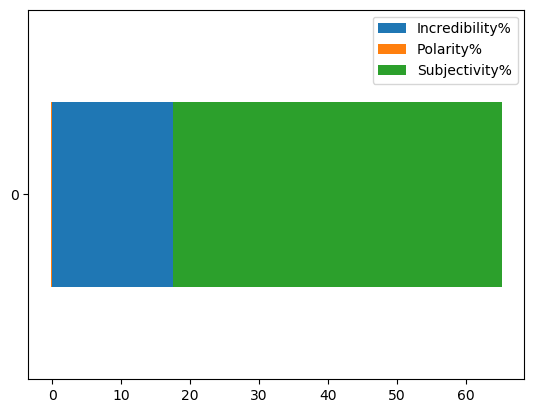

In [29]:
#############################################################################
#This programm provides calculates BiasIndicator, Incredibility,Polarity,
#Subjectivity as percentofBiasIndicator for further graphing
#Article Incredibility, Polarity, Subjectivity taking in Article url as input 
#results are stored in Json and Excel
#to be modified to accept 'url' from 'input field'
#############################################################################

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
plt.rcdefaults()

def getText(url):
    from newspaper import Article
    ### Getting the Text
    article = Article(url)
    article.download()
    article.parse()
    text = article.text
    return(text);
######################### Polarity and Subjectivity#################
def sentimentAnalysis(url):
    from textblob import TextBlob
    text = getText(url)
    ### analysing the text 
    testimonial = TextBlob(text)
    return(testimonial);  

url = "https://metro.co.uk/2020/09/21/ftse-100-suffers-worst-day-since-mid-june-as-shares-tumble-over-lockdown-fears-13304315/"
getText(url)

polaritySubjectivity= pd.DataFrame(sentimentAnalysis(url).sentiment)  
polaritySubjectivity.rename(index={0:'Polarity',1:'Subjectivity'}, inplace=True)
polaritySubjectivityResults=polaritySubjectivity.T
#print(polaritySubjectivityResults)
def getCredibilityScore(url):
####import requests
    Gate_Source_Cred_API = "https://cloud-api.gate.ac.uk/process-document/source-credibility?annotations=:DomainCredibility"
    reliability_txt = requests.post(Gate_Source_Cred_API, data = url, headers={'Content-Type': 'text/plain'}, 
                                    auth=('gc77cl10gevd', 'u7c5eeadladbtro9qul5'))
    ## Auth key - Jyothsna
    CredibilityText = reliability_txt.json()
    if (CredibilityText['entities'] != {}):
        for item in CredibilityText['entities']['DomainCredibility']:
            CredibilityScore = item.get('credibility-score', 0)
            CredibilityCategory = item.get('credibility-category', '')
            CredibilitySource = item.get('credibility-source', '')
            if item['credibility-source'] == 'Media Bias/Fact Check':
                return(url, CredibilityScore, CredibilityCategory, CredibilitySource)
    else:
        return("Not Available")    
    ## in case there is no 'Media Bias/Fact Check' but a different source:
    return(url, CredibilityScore, CredibilityCategory, CredibilitySource)
######################### Credibility ######################
#getCredibilityScore(url)
credibility= pd.DataFrame(getCredibilityScore(url))  
credibility.rename(index={0:'Article',1:'CredibilityScore',2:'CredibilityCategory',3:'CredibilitySource'}, inplace=True)
credibilityResults=credibility.T
result = pd.concat([credibilityResults, polaritySubjectivityResults], axis=1, sort=False)
#print(result)
#result.to_excel("Measurements.xlsx", sheet_name='results_1')  
#result.to_json(r'C:\Users\jyoth\TheSentimentalistsPythonCode\Measurements.json')

######################### BIAS Calculations #################
import matplotlib.pyplot as plt
plt.rcdefaults()

IncredibilityPercent = (100-(credibilityResults['CredibilityScore']))
PolarityPercent = ((polaritySubjectivityResults['Polarity'])*100)
SubjectivityPercent = ((polaritySubjectivityResults['Subjectivity'])*100)
# print(IncredibilityPercent)
# print(PolarityPercent)
# print(SubjectivityPercent)

TotalScore = (IncredibilityPercent+PolarityPercent+SubjectivityPercent)
BiasIndicator = ((IncredibilityPercent + abs(PolarityPercent) + SubjectivityPercent)/3)

# print(TotalScore)
# print(BiasIndicator)

# ArticleIncredibilityPercent = (100-(credibilityResults['CredibilityScore']))
# ArticlePolarityBetweenMod1to0 = (polaritySubjectivityResults['Polarity'])
# ArticleSubjectivityBetween0to1 = (polaritySubjectivityResults['Subjectivity'])

# print(ArticleIncredibilityPercent)
# print(ArticlePolarityBetweenMod1to0)
# print(ArticleSubjectivityBetween0to1)
# print(BiasIndicator)

ArticleIncredibility = (IncredibilityPercent/ TotalScore)*100
ArticlePolarity = (PolarityPercent/ TotalScore)*100
ArticleSubjectivity = (SubjectivityPercent/ TotalScore)*100

# print(ArticleIncredibility)
# print(ArticlePolarity)
# print(ArticleSubjectivity)

dfBias={'Article':url,'BiasIndicator':BiasIndicator,'Incredibility%' :IncredibilityPercent,'Polarity%' : PolarityPercent, 'Subjectivity%':SubjectivityPercent,
        'ArticleIncredibility': ArticleIncredibility, 'ArticlePolarity': ArticlePolarity, 'ArticleSubjectivity': ArticleSubjectivity}

print(dfBias)
result= pd.DataFrame(dfBias)
#print(result)
result.to_excel("BiasIndicatorValues.xlsx", sheet_name='results_1')  
result.to_json(r'C:\Users\jyoth\TheSentimentalistsPythonCode\BiasIndicatorValues.json')

#ax = result.plot.barh(stacked=True)

dfBias0={'Article':url,'BiasIndicator':BiasIndicator}
result0=pd.DataFrame(dfBias0)
ax0= result0.plot.barh(stacked=True)

dfBias1={'Incredibility%' :IncredibilityPercent,'Polarity%' : PolarityPercent, 'Subjectivity%':SubjectivityPercent}
result1=pd.DataFrame(dfBias1)
ax1= result1.plot.barh(stacked=True)